#### Objective for IVSCC Manuscript Graphs

In [1]:
"""
Lockdown Date: 190830 for all graphs
nucleus_present vs nucleus_absent data:
-Restrict data collection range: anything with MET project code to 180620
-Because we only collect nucleus present after 180620
-MET data only

Nucleus_present analysis:
-present vs. absent

Comparion of present vs. absent with:
-cDNA quality (%>400 bp)
-Tree call(core, I1, I2, I3 and PoorQ)
-# of genes
-amplified content same as cDNA quantity (picogreen yield)
"""

'\nLockdown Date: 190830 for all graphs\nnucleus_present vs nucleus_absent data:\n-Restrict data collection range: anything with MET project code to 180620\n-Because we only collect nucleus present after 180620\n-MET data only\n\nNucleus_present analysis:\n-present vs. absent\n\nComparion of present vs. absent with:\n-cDNA quality (%>400 bp)\n-Tree call(core, I1, I2, I3 and PoorQ)\n-# of genes\n-amplified content same as cDNA quantity (picogreen yield)\n'

#### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

#### Path variables

In [4]:
csv_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/csvs/"
graph_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/graphs/"
excel_path = "C:/Users/ramr/Documents/Github/Personal-Projects/ivscc_paper/excel_sheets/"

#### Read Shiny mouse

In [5]:
shinym_df = pd.read_csv("//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv")
shinym_df.to_csv(csv_path + "shiny_mouse.csv")

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Filter to desired columns in shinym_df

In [6]:
shinym_col_list = ["sample_id",
                   "Data",
                   "postPatch",
                   "percent_cdna_longer_than_400bp",
                   "amplified_quantity_ng",
                   "Genes.Detected.CPM", #Same one Kristen used
                   "Tree_call",
                   "marker_sum_norm_label"]
##"Genes.With.CPM", "Genes.With.FPKM", "Genes.Detected", #Probably not the correct ones
shinym_df = shinym_df[shinym_col_list]
len(shinym_df)

9644

#### Filtering shinym_df based on conditions and creating/sorting by date column

In [7]:
shinym_df.dropna(subset=["postPatch"], inplace=True) # 7 NaN samples
shinym_df["date"] = shinym_df.sample_id.str[5:11]
shinym_df.sort_values("date", inplace=True)
shinym_df.set_index("date", inplace=True)
shinym_df = shinym_df.loc[:"180620"]

In [8]:
prod_df = shinym_df[shinym_df["Data"] == "Production"]
len(prod_df)

3162

#### met_df has only cells with project code mIVSCC-MET

In [9]:
met_df = prod_df[(prod_df.postPatch == "nucleus_present") | (prod_df.postPatch == "nucleus_absent")]
len(met_df)

2916

#### Replacing all terminology to nucleus_present and nulceus_absent for all production data

In [10]:
replacements = {"Nucleated" : "nucleus_present", 
                "Partial-Nucleus" : "nucleus_present",
                "No-Seal" : "nucleus_absent",
                "Entire-Cell" : "nucleus_absent",
                "entire_cell" : "nucleus_absent",
                "Outside-Out" : "nucleus_absent"}
prod_df["postPatch"] = prod_df["postPatch"].replace(replacements)

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
prod_df.postPatch.value_counts()

nucleus_present    2072
nucleus_absent     1090
Name: postPatch, dtype: int64

In [12]:
met_df.postPatch.value_counts()

nucleus_present    1916
nucleus_absent     1000
Name: postPatch, dtype: int64

In [13]:
met_df

,sample_id,Data,postPatch,percent_cdna_longer_than_400bp,amplified_quantity_ng,Genes.Detected.CPM,Tree_call,marker_sum_norm_label
date,,,,,,,,
171002,P8S4_171002_355_A01,Production,nucleus_present,0.433,20.745630,6587,I2,0.788812
171002,P9S4_171002_403_A01,Production,nucleus_absent,0.334,3.784308,3064,PoorQ,0.314863
171002,P9S4_171002_405_A01,Production,nucleus_absent,0.387,3.447394,2212,PoorQ,0.426114
171002,P9S4_171002_404_A01,Production,nucleus_present,0.479,3.642626,3174,PoorQ,0.267158
171002,P9S4_171002_406_A01,Production,nucleus_absent,0.436,4.673653,3560,PoorQ,0.286005
171002,P2S4_171002_053_A01,Production,nucleus_absent,0.486,2.548507,2747,PoorQ,0.407652
171002,P2S4_171002_055_A01,Production,nucleus_present,0.715,15.401426,7375,Core,0.966441
171002,P8S4_171002_356_A01,Production,nucleus_present,0.672,11.645717,6965,Core,0.872312
171002,P8S4_171002_354_A01,Production,nucleus_present,0.430,12.071228,5026,Core,1.062120


#### Graph Function for Violin Graph

In [14]:
colors = ["#74c476", "#fb6a4a"] #TEa, VISp

def vioplt(col, col_label, df):
    plt.figure(figsize=(5, 6))
    ax=sns.violinplot(x="postPatch", y=col, data=df, scale="count", inner="quartile", 
                      linewidth=1, saturation=1, width=0.9, palette=colors)
    ax=sns.swarmplot(x="postPatch", y=col, data=df, linewidth=1, size=0.3, color="0.2")
    ax.set_xlabel("Post Patch Outcome")
    ax.set_ylabel(col_label, fontsize=16)
    plt.savefig(graph_path + "met_vio" + col + ".jpeg", bbox_inches="tight")

#### Graph Functions for Stacked Percentage Bar Graph

In [15]:
def piv_table(df):
    df1 = df.loc[:,["postPatch", "Tree_call", "Data"]]
    df1 = df.groupby(["postPatch", "Tree_call"]).count()
    df1 = df1.rename(columns = {"Data" : ""})
    df1.reset_index(inplace = True)
    df1 = df1.pivot_table(values=[''], index=["postPatch"], columns = ["Tree_call"], aggfunc="sum")
    return df1

def stacked_plot(df):
    nuc_order = ["nucleus_present", "nucleus_absent"]
    my_colors = ['#74c476', '#de2d26']
    bp = df.loc[nuc_order].plot(kind="bar", stacked = True, figsize= (8,6), rot = 0, 
                 colormap=ListedColormap(sns.color_palette("GnBu", 10)),width = 0.4)

    bp.legend(["Core", "I1", "I2", "I3", "PoorQ"], loc = 0, bbox_to_anchor = (1, 1.02), 
              frameon = True, shadow = True, fontsize = 13)

    plt.subplots_adjust(left = 0.1, right = 0.8, bottom = None, top = None, wspace=None, hspace=None)
    #This helps if axis labels are getting cutoff when saving final image

    #Rusty's Method figure it out later
    rects = bp.patches
    labels = post_patch_totals

    #Rusty's Method figure it out later
    for rect, label in zip (rects, labels):
        height = 100
        x_value = rect.get_x() + rect.get_width() / 2
        bp.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', size = 12)

    bp.set_title("Tree calls for Post Patch Outcomes")
    bp.set(xlabel = "Post Patch Outcome", ylabel = "Percentage")
    plt.savefig(graph_path + "met_stk.jpeg", bbox_inches="tight")

#### Violin Graphs

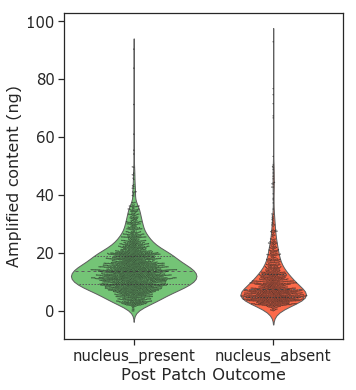

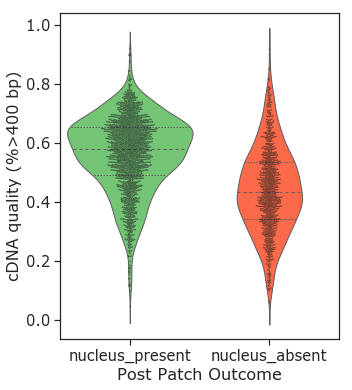

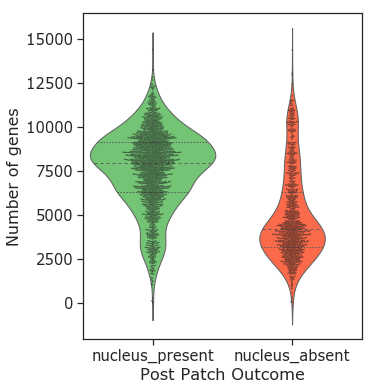

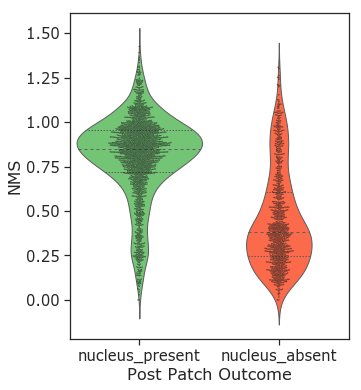

In [21]:
vioplt("amplified_quantity_ng", "Amplified content (ng)", met_df[met_df.amplified_quantity_ng <= 100])
vioplt("percent_cdna_longer_than_400bp", "cDNA quality (%>400 bp)", met_df[met_df.percent_cdna_longer_than_400bp <= 1])
vioplt("Genes.Detected.CPM", "Number of genes", met_df)
vioplt("marker_sum_norm_label", "NMS", met_df)

#### Stacked Percentage Bar Graph

In [17]:
met_df1 = piv_table(met_df)
post_patch_totals = list(met_df1.sum(1))
post_patch_totals = [int(x) for x in post_patch_totals]
met_df1 = met_df1.div(met_df1.sum(1), axis=0) * 100
met_df1

Tree_call             Core        I1         I2        I3      PoorQ
postPatch                                                           
nucleus_absent   11.600000   8.50000   4.000000  1.000000  74.900000
nucleus_present  46.503132  18.94572  14.718163  1.983299  17.849687

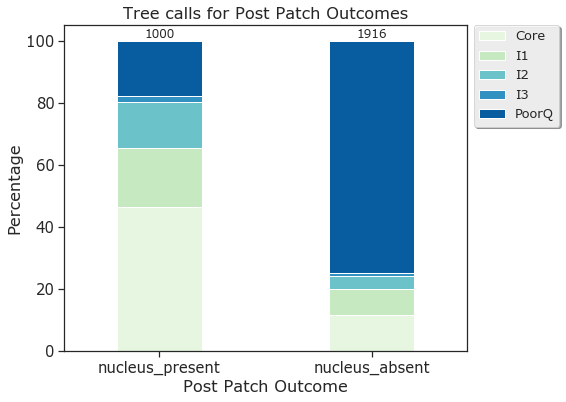

In [18]:
stacked_plot(met_df1)

#### Countplot for Tree_calls for nucelus_present vs nucleus_absent

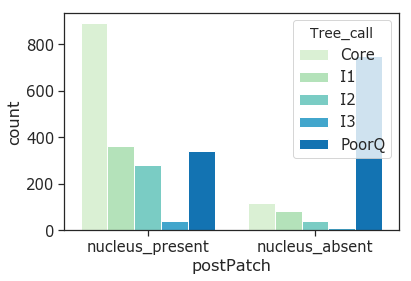

In [19]:
sns.countplot(x="postPatch", hue="Tree_call", hue_order = ["Core", "I1", "I2", "I3", "PoorQ"],
              data=met_df, palette="GnBu", saturation=1)

#### Writing dataframe into Excel Sheets

In [20]:
writer = pd.ExcelWriter(graph_path + "nucleus_present_absent_RR.xlsx")
met_df.to_excel(writer, "MET Data", freeze_panes=(1,0))
prod_df.to_excel(writer, "Production Data", freeze_panes=(1,0))
shinym_df.to_excel(writer, "Reference Shiny Mouse Data", freeze_panes=(1,0))
writer.save()